In [1]:
#Load required packages
%matplotlib inline
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import pandas as pd
import cftime

import IPython.display
import cmocean as cm
import cartopy.crs as ccrs
import cartopy.feature as cft
import sys, os
import warnings
warnings.simplefilter("ignore") 
import glob

import cosima_cookbook as cc

from dask.distributed import Client

In [2]:
# Plot ERA-5 data:
Fold = '/g/data/rt52/era5/single-levels/reanalysis/10u/1980/'

ERA5_10u = xr.open_mfdataset(glob.glob(Fold + '/*.nc'))
ERA5_10u.u10.sel(longitude=-92.5).sel(latitude=0.).sel(time=slice('1980-02-01','1980-05-01')).plot()

OSError: no files to open

In [5]:
# Plot daily minimum wind stress:
FoldOUT = '/g/data/e14/rmh561/access-om2/archive/1deg_era5_iaf/'
taux_daily_min = xr.open_mfdataset(glob.glob(FoldOUT + '/output000/ocean/ocean-2d-tau_x-1-daily-min*.nc')).tau_x_min

# Plot daily minimum wind stress:
FoldOUT = '/g/data/e14/rmh561/access-om2/archive/1deg_era5_iaf_perror/'
taux_daily_min_2 = xr.open_mfdataset(glob.glob(FoldOUT + '/output000/ocean/ocean-2d-tau_x-1-daily-min*.nc')).tau_x_min

# Plot daily minimum wind stress:
FoldOUT = '/g/data/e14/rmh561/access-om2/archive/1deg_era5_iaf_fix4/'
taux_daily_min_4 = xr.open_mfdataset(glob.glob(FoldOUT + '/output000/ocean/ocean-2d-tau_x-1-daily-min*.nc')).tau_x_min

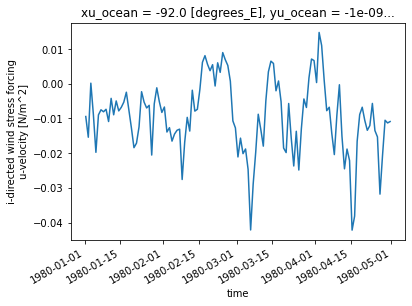

In [4]:

FoldOUT = '/g/data/e14/rmh561/access-om2/archive/1deg_era5_iaf_fix4/'
taux_daily_min_3 = xr.open_mfdataset(glob.glob(FoldOUT + '/output000/ocean/ocean-2d-tau_x-1-daily-min*.nc')).tau_x_min
taux_daily_min_3.sel(xu_ocean=-92.5,method='nearest').sel(yu_ocean=0.,method='nearest').sel(time=slice('1980-01-01','1980-05-01')).plot(label='Fix2: No caching in forcing')


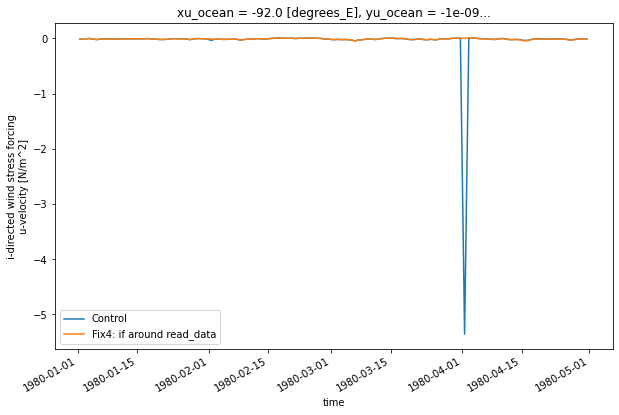

In [8]:
plt.figure(figsize=(10,6))
taux_daily_min.sel(xu_ocean=-92.5,method='nearest').sel(yu_ocean=0.,method='nearest').sel(time=slice('1980-01-01','1980-05-01')).plot(label='Control')
#taux_daily_min_2.sel(xu_ocean=-92.5,method='nearest').sel(yu_ocean=0.,method='nearest').sel(time=slice('1980-01-01','1980-05-01')).plot(label='Altered packing')
taux_daily_min_4.sel(xu_ocean=-92.5,method='nearest').sel(yu_ocean=0.,method='nearest').sel(time=slice('1980-01-01','1980-05-01')).plot(label='Fix4: if around read_data')
plt.legend()

In [8]:
# Change the packing and write it out:
file_in = '/g/data/rt52/era5/single-levels/reanalysis/10u/1980/10u_era5_oper_sfc_19800301-19800331.nc'
file_out = '/g/data/e14/rmh561/access-om2/input/ERA-5/IAF/10u/1980/10u_era5_oper_sfc_19800301-19800331.nc'
DS = xr.open_dataset(file_in)
encoding = {}
scale = 0.000966930321007164 # Apr 1980 value
offset = -0.761652898754254 # Apr 1980 value
encoding['u10'] = {'scale_factor': scale, 'add_offset': offset, 'dtype': 'int16', '_FillValue' = }
DS.to_netcdf(file_out,encoding=encoding)

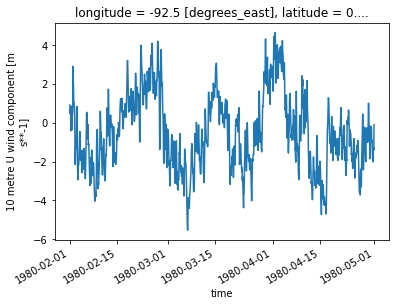

In [6]:
# Plot ERA-5 data (from e14 with altered packing):
Fold = '/g/data/e14/rmh561/access-om2/input/ERA-5/IAF/10u/1980/'

ERA5_10u = xr.open_mfdataset(glob.glob(Fold + '/*.nc'))
ERA5_10u.u10.sel(longitude=-92.5).sel(latitude=0.).sel(time=slice('1980-02-01','1980-05-01')).plot()

In [15]:
# Plot daily minimum surface potential temperature from 1deg_era5_iaf:
FoldOUT = '/g/data/e14/rmh561/access-om2/archive/1deg_era5_iaf/'

sst_daily_min = xr.open_mfdataset(glob.glob(FoldOUT + '/output***/ocean/ocean-2d-surface_pot_temp-1-daily-min*.nc')).surface_pot_temp_min

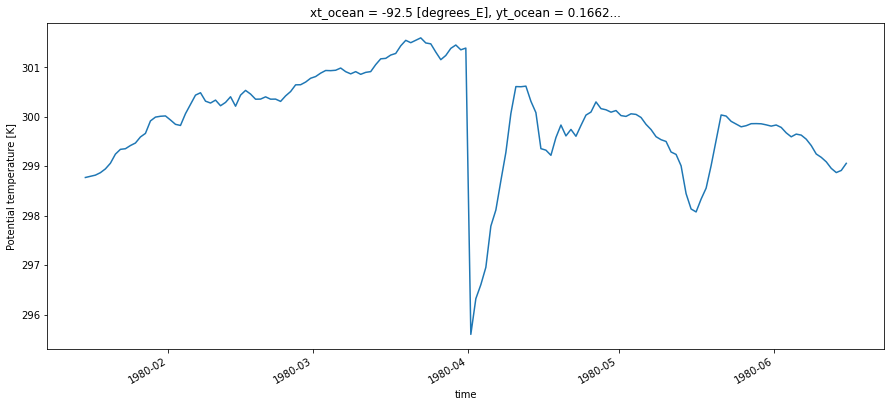

In [21]:
plt.figure(figsize=(15,6))
sst_daily_min.sel(xt_ocean=-92.5,method='nearest').sel(yt_ocean=0.,method='nearest').sel(time=slice('1980-01-15','1980-06-15')).plot()

(-30.0, 30.0)

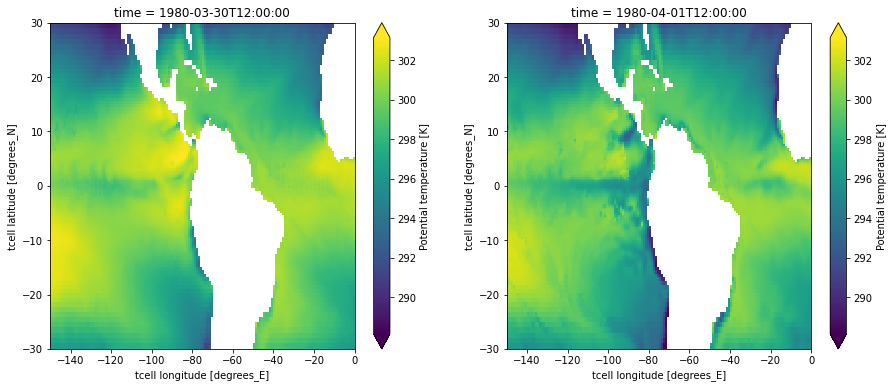

In [25]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sst_daily_min.sel(time='1980-03-30',method='nearest').plot(vmin=288.15,vmax=303.15)
plt.xlim([-150.,0.])
plt.ylim([-30.,30.])

plt.subplot(1,2,2)
sst_daily_min.sel(time='1980-04-01',method='nearest').plot(vmin=288.15,vmax=303.15)
plt.xlim([-150.,0.])
plt.ylim([-30.,30.])